In [1427]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1428]:
def lin(currentno, skill, totalno):
    return skill

def inc(currentno, skill, totalno):
    # return skill * (0.85 + 0.3 * (currentno/totalno)**0.5)
    return skill + (((1-skill)**2) * (currentno/totalno)**0.5)

def dec(currentno, skill, totalno):
    #return skill * (1.15 - 0.3 * (currentno/totalno)**1.5)
    return skill - (((1-skill)**2) * (currentno/totalno)**0.5)*0.5

def testtype(liste, diminish_rounds):
    return [i + i*(0.1* max(0,(1-(index/ min(len(liste), diminish_rounds*3))**2 )) ) for index, i in enumerate(liste)]


def create_pers_obs(subject_ID, number_obs, treatment, treatment_round, variance):
    temp_df = pd.DataFrame()
    temp_df["subjectID"] = [subject_ID]*number_obs
    temp_df["observationID"] = [i for i in range(1,number_obs+1)]
    skill = np.random.beta(2,2) * 0.5 + 0.25
    temp_df["skill"] = [skill]*number_obs
    trend = random.choice(["lin", "dec", "inc", "lin", "lin", "inc"])
    print(trend)

    if trend == "lin":
        tl = [lin(i, skill, number_obs) for i in temp_df["observationID"]]
    if trend == "inc":
        tl = [inc(i, skill, number_obs) for i in temp_df["observationID"]]
    if trend == "dec":
        tl = [dec(i, skill, number_obs) for i in temp_df["observationID"]]

    temp_df["trend"] = tl

    temp_df["variance_trend"] = [min(max(0,(1+random.uniform(-variance,variance)) * i),1) for i in temp_df["trend"]]

    feedbacklist = [i for i in temp_df["variance_trend"]]
    for i in range(2, len(feedbacklist),3):
        avg = sum(feedbacklist[i-2:i+1]) / 3  # Calculate the average of current and two previous entries
        feedbacklist[i-2:i+1] = [avg] * 3
    temp_df["feedback"] = feedbacklist


    treatment_obs = treatment_round * 3
    if treatment == "negative":
        temp_df["treat_neg"] = [1] * number_obs
        temp_df["treat_pos"] = [0] * number_obs
        temp_df["post_treat"] = [0]*treatment_obs + [1]*(number_obs-treatment_obs)

    if treatment == "positive":
        temp_df["treat_neg"] = [0] * number_obs
        temp_df["treat_pos"] = [1] * number_obs
        temp_df["post_treat"] = [0]*treatment_obs + [1]*(number_obs-treatment_obs)
    
    if treatment == "control":
        temp_df["treat_neg"] = [0] * number_obs
        temp_df["treat_pos"] = [0] * number_obs
        temp_df["post_treat"] = [0]*treatment_obs + [1]*(number_obs-treatment_obs)

    temp_df["quality"] = [i for i in temp_df["variance_trend"][:treatment_obs]] + testtype([i for i in temp_df["variance_trend"][treatment_obs:]],7)

   # print(temp_df)
    return temp_df

In [1429]:
tempdf = create_pers_obs(2, 120, "negative",20,0.05)



inc


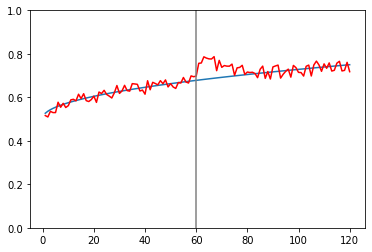

In [1430]:
plt.plot(tempdf["observationID"], tempdf["trend"])
plt.plot(tempdf["observationID"], tempdf["quality"], color = "red")
plt.axvline(60, color = "gray")
plt.ylim(0,1)


plt.show()